# Rankine-Hugoniot, choc attaché et réflexion

On vous propose de mettre en place ...

`Python` sera utilisé ici comme `matlab`. Des fonctionnalités supplémentaires peuvent être ajoutées par l'import de modules, standards à une distribution (comme `math`, `numpy`) ou personnalisés comme ci-dessous. Des fonctionnalités d'édition sont propres à [`Ipython/Notebook`](#ipython).

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from hades.common import defaultgas
from hades.aero import degree    as deg # import trigo functions with degree unit support
from hades.aero import ShockWave as sw  # import functions for shockwave computation
%matplotlib inline

On définit tout d'abord les paramètres de ce cas. Ils sont définis comme des variables globales, que l'on peut utiliser directement dans les fonctions (comme $\gamma$ par exemple).

wall deviation  (deg): 18.0 with upwstream Mach number 2.8


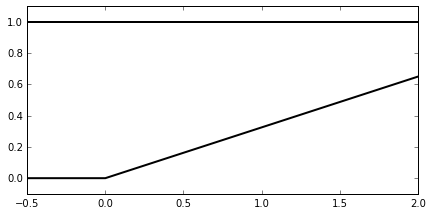

In [2]:
# definition of problem parameters
gam  = 1.4 ; defaultgas.set_gamma(gam)
M0   = 2.8
wdev = 18.
print("wall deviation  (deg): {} with upwstream Mach number {}".format(wdev, M0))

# function to plot the geometry
#
def plot_geom(xneg=-.5, length=2., dev=wdev, zoom=1):
    fig = plt.figure(figsize=(14*zoom,8*zoom))
    ax  = fig.add_subplot(111) 
    #plt.axis([xneg, length])
    ax.set(aspect="equal", xlim=[xneg, length], ylim=[-.1, 1.1])
    plt.plot([xneg, length],    [1, 1],                      color="black", linewidth=2)
    plt.plot([xneg, 0, length], [0, 0, length*deg.tan(dev)], color="black", linewidth=2)
    
plot_geom(dev=wdev, zoom=.5)

## Premier choc attaché

In [12]:
devmax   = sw.dev_Max(M0)
devsonic = sw.dev_Sonic(M0)
print(("For upstream Mach number M0= {:1.4},\n* maximum deviation is {:1.4}°\n"+
      "* limit for downstream supersonic flow is {:1.4}°").format(M0, devmax, devsonic))

For upstream Mach number M0= 2.8,
* maximum deviation is 32.59°
* limit for downstream supersonic flow is 32.5°


In [4]:
sig1 = sw.sigma_Mach_deflection(M0, wdev)
Mn0  = M0*deg.sin(sig1)
p1p0 = sw.Ps_ratio(Mn0)
Mn1  = sw.downstream_Mn(Mn0)
M1   = Mn1/deg.sin(sig1-wdev)
print("shock with {:1.4}° deviation and angle {:1.4}; downstream Mach number is M1= {:1.4}".format(wdev, sig1, M1))

shock with 18.0° deviation and angle 37.1; downstream Mach number is M1= 1.961°


## Réflexion du choc



In [5]:
sig2 = sw.sigma_Mach_deflection(M1, wdev)
Mn1  = M1*deg.sin(sig2)
p2p1 = sw.Ps_ratio(Mn1)
Mn2  = sw.downstream_Mn(Mn1)
M2   = Mn2/deg.sin(sig2-wdev)
print("shock reflexion with {:1.4}° deviation and angle {:1.4}°".format(wdev, sig2))
p2p0 = p2p1*p1p0

shock reflexion with 18.0° deviation and angle 50.9°


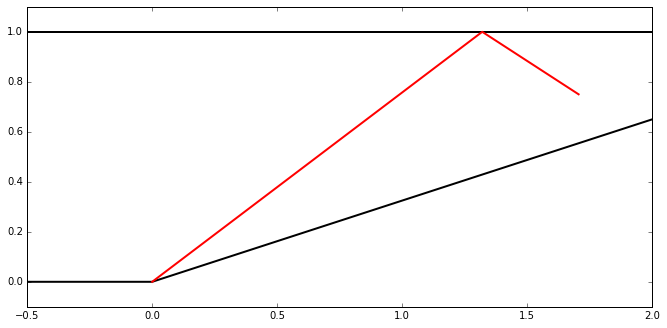

In [6]:
yend=.75 # parameter to draw reflected shock
plot_geom(dev=wdev, zoom=.8)
xup  = 1./deg.tan(sig1)                     # impact of first shock on top wall
xbot = xup + (1.-yend)/deg.tan(sig2-wdev)   # abscissa of reflected shock at yend
plt.plot([0, xup, xbot], 
         [0,   1, yend], 'red', linewidth=2)

# Représentation dans la polaire

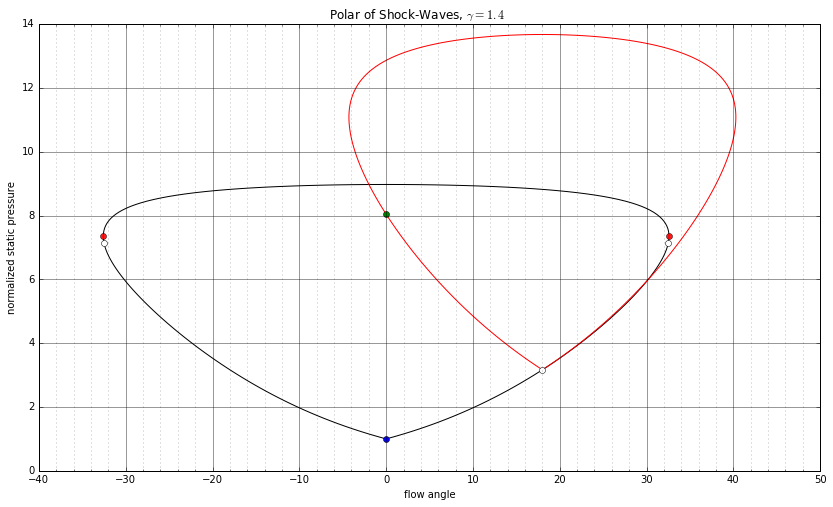

In [14]:
import hades.aero.plot.shockpolar as swplt

fig=swplt.figure_theta_pressure(figsize=(14,8))
fig.suptitle('Polar of Shock-Waves, $\gamma = %.1f$'%gam, fontsize=12, y=0.93)
plt.xlabel('flow angle', fontsize=10)
plt.ylabel('normalized static pressure', fontsize=10)
if p2p0 < 20.: plt.yscale('linear') # default is logarithmic
#
# plot polar curves
swplt.plot_theta_pressure(M0, devmax=True, sonic=True)
swplt.plot_theta_pressure(M1, thet_init=wdev, p_init=p1p0, color='red')

# plot symbols for flow regions
plt.plot(0,    1.,   'bo')
plt.plot(wdev, p1p0, 'wo')
plt.plot(0.,   p2p0, 'go')

---

<a id="ipython"></a>
## Ipython et notebook : usage

* le notebook utilise la langage de base python en version améliorée, Ipython, qui permet la complétion des noms (variables, fonctions, modules) avec la touche tabulation
* toutes les cellules peuvent être modifiées par un double-clic et sont réinterprêtées avec `shift-entrée`
* l'ensemble de la feuille peut être exécutée avec le menu `Cell/run all cells`
* **n'oubliez pas de sauvegarder régulièrement votre feuille** (bouton _enregistrer_)


In [8]:
from IPython.core.display import HTML ; HTML(open("./custom.css", "r").read()) # notebook style